<a href="https://colab.research.google.com/github/JonidamGraphics/ProjectResources/blob/master/Fake_News_Detection_on_Social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install Pydrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [46]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np

In [49]:
df_fake_news = pd.read_csv('/content/drive/MyDrive/MPW/Fake.csv', encoding = 'latin1')

In [50]:
df_real_news = pd.read_csv('/content/drive/MyDrive/MPW/Real.csv', encoding = 'latin1')

In [51]:
#dummy = pd.get_dummies(df_merge['label'])
#df_merge = pd.concat((df_merge, dummy), axis=1)
#df_merge = df_merge.drop(['FAKE'], axis=1)
#df_merge.rename(columns={"REAL":"class"})
df_fake_news["class"] = 0
df_real_news["class"] = 1

In [52]:
df_merge = pd.concat([df_fake_news, df_real_news], axis=0)

In [53]:
df_fake_news.count()

title      23481
text       23481
subject    23481
date       23481
class      23481
dtype: int64

In [54]:
df_real_news.count()

title      21417
text       21417
subject    21417
date       21417
class      21417
dtype: int64

In [55]:
 # Find Missing Data if any
def find_missing_vals(data):
  total = len(data)
  for column in data.columns:
    if data[column].isna().sum() !=0:
      print("{} has: {:,} ({:.2}%) missing values,".format(column.data[column].isna().sum(),
                                                          (data[column].isna().sum()/total)*100))
    else:
        print("{} has no any missing value".format(column))
        print("\nMissing Value Summary\n{}",format("-"*35))
        print("\ndf_db\n{}".format("-"*15))
        print(data.isnull().sum(axis = 0))

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

In [57]:
df_fake_news ['class']=0

In [58]:
df_real_news ['class']=1

In [59]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Remove Stopwords and Punctuations

In [61]:
import string

In [62]:
from nltk.corpus import stopwords

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Basic Data Exploration

class
0    23481
1    21417
Name: title, dtype: int64


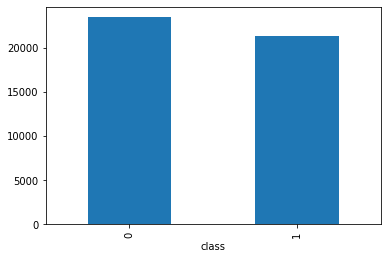

In [64]:
# How many news per class?
import matplotlib. pyplot as plt
print(df_merge.groupby(['class'])['title'].count())
df_merge.groupby(['class'])['title'].count().plot(kind='bar')
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: title, dtype: int64


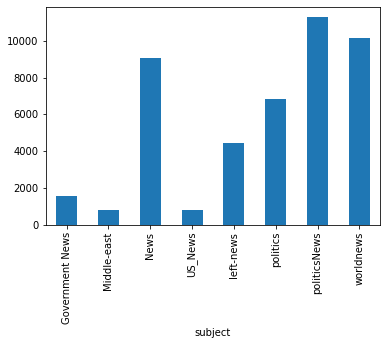

In [65]:
# How many news per Subject?
import matplotlib. pyplot as plt
print(df_merge.groupby(['subject'])['title'].count())
df_merge.groupby(['subject'])['title'].count().plot(kind='bar')
plt.show()

In [66]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
def text_process (text):
  no_punctuation = [char for char in text if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

Model Creation and Training

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x = df_merge["title"]
y = df_merge["class"]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(df_merge['title'] , df_merge['class'], test_size=0.3)
x_test

6013     In Trump era, Democrats and Republicans switch...
3482     EU could respond to 'market distortions' if U....
14081    WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...
13326    HILLARYâS VP NOMINEE PANDERS TO BLACKS: âI...
13383    Japan's Emperor Akihito to abdicate on April 3...
                               ...                        
4505     U.S. appeals court sets May hearing on revised...
21045    Britain's Queen Elizabeth opens Scotland's thi...
4389             Italy says supports U.S. strikes on Syria
15688    ISIS SUPPORTER RESPONDS TO KILLING OF TOP ISIS...
187       Trumpâs ICE Thugs Stop Ambulance Taking 10-...
Name: title, Length: 13470, dtype: object

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
xv_test.shape

(13470, 21718)

In [75]:
y_test.shape

(13470,)

In [76]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [77]:
pred_LR = LR.predict(xv_test)

In [78]:
LR.score(xv_test, y_test)

0.9565701559020044

In [79]:
pred_LR = LR.predict(xv_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7083
           1       0.94      0.96      0.95      6387

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [81]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
LR.classes_
cm = metrics.confusion_matrix(y_test, pred_LR, labels = LR.classes_)
print(cm)

[[6723  360]
 [ 225 6162]]


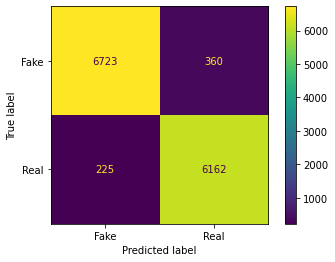

In [82]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_disp.plot()

Decision Tree Classification

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [85]:
DT.score(xv_test, y_test)

0.9175204157386786

In [86]:
pred_DT = DT.predict(xv_test)

In [87]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7083
           1       0.90      0.92      0.91      6387

    accuracy                           0.92     13470
   macro avg       0.92      0.92      0.92     13470
weighted avg       0.92      0.92      0.92     13470



In [88]:
DT.classes_
cm = metrics.confusion_matrix(y_test, pred_DT, labels = DT.classes_)
print(cm)

[[6462  621]
 [ 490 5897]]


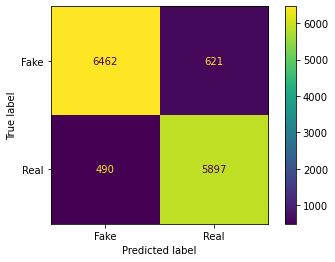

In [89]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_disp.plot()

Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
GBC.score(xv_test, y_test)

0.890423162583519

In [92]:
pred_GBC = GBC.predict(xv_test)
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7083
           1       0.84      0.96      0.89      6387

    accuracy                           0.89     13470
   macro avg       0.90      0.89      0.89     13470
weighted avg       0.90      0.89      0.89     13470



[[5874 1209]
 [ 267 6120]]


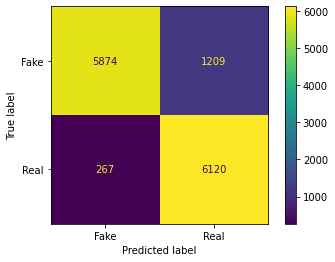

In [93]:
GBC.classes_
cm = metrics.confusion_matrix(y_test, pred_GBC, labels = GBC.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_disp.plot()

In [94]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier

In [95]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
RFC.score(xv_test, y_test)

0.9544172234595397

In [96]:
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7083
           1       0.94      0.97      0.95      6387

    accuracy                           0.95     13470
   macro avg       0.95      0.96      0.95     13470
weighted avg       0.96      0.95      0.95     13470



[[6662  421]
 [ 193 6194]]


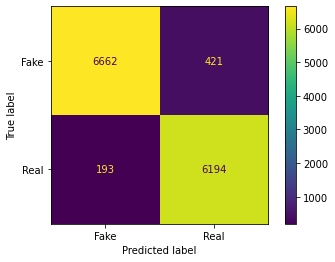

In [97]:
RFC.classes_
cm = metrics.confusion_matrix(y_test, pred_RFC, labels = RFC.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_disp.plot()

In [98]:
# Deep Learning Multi-perceptron Neural Network Binary Classifier

In [99]:
from nltk.tree import MultiParentedTree
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
MLP = MLPClassifier(random_state=0)
MLP.fit(xv_train, y_train)
MLP.score(xv_test, y_test)

0.9593912397921307

In [100]:
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7083
           1       0.94      0.97      0.95      6387

    accuracy                           0.95     13470
   macro avg       0.95      0.96      0.95     13470
weighted avg       0.96      0.95      0.95     13470



[[6662  421]
 [ 193 6194]]


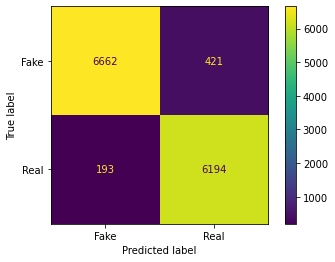

In [101]:
MLP.classes_
cm = metrics.confusion_matrix(y_test, pred_RFC, labels = MLP.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_disp.plot()

# New Section